In [2]:
import numpy as np
import matplotlib.pyplot as plt
from generation_parameters import get_params
from db_config import DBConfig
from metadata_synthesizer import MetadataSynthesizer
import mat73
from audio_synthesizer import AudioSynthesizer
from audio_mixer import AudioMixer

from IPython.display import Audio
import pickle

In [3]:
# use parameter set defined by user
task_id = '1' 
params = get_params(task_id)

### Create database config based on params (e.g. filelist name etc.)
db_config = DBConfig(params)

SET: 1
USING DEFAULT PARAMETERS FOR NIGENS DATA

	db_name: nigens
	rirpath: /scratch/ci411/TAU_SRIR_DB/TAU-SRIR_DB
	mixturepath: /scratch/ci411/DCASE_GEN/mixtures/nigens_1
	noisepath: /scratch/ci411/TAU_SRIR_DB/TAU-SNoise_DB
	nb_folds: 2
	rooms2fold: [[10, 6, 1, 4, 3, 8], [9, 5, 2, 0, 0, 0]]
	db_path: /scratch/ci411/NIGENS
	max_polyphony: 3
	active_classes: [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13]
	nb_mixtures_per_fold: [900, 300]
	mixture_duration: 60.0
	event_time_per_layer: 40.0
	audio_format: both
	obj_path: db_config_fsd.obj
	old_meta_synth: False

bomb_shelter
['close', 'far']
circular
[[2.5 5. ]]
[[0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]]
[[0.  0.  1.2]]

gym
['close', 'far']
circular
[[2.5 5. ]]
[[0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]]
[[0.  0.  1.2]]

pb132
['close', 'far']
circular
[[1.4 2.8]]
[[0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]]
[[0.  0.  1.2]]

pc226
['close', 'far']
circular
[[1.35 2.7 ]]
[[0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]]
[[0.  0.  1.2]]

sa203
['j1', 'j2', 'j3', 'j4'

# DB_CONFIG DATA MAP

- _rirpath
  - STR - path to TAU-SRIR_DB
- _mixturepath
  - STR - path to nixture output
- _measinfo
  - DICT - keys are room names
    - trajectories - LIST of STR
    - trajectory_type - STR - {'circular', 'linear'}
    - distances - np.ndarray of FLOAT - (1, n_trajs) for circular, (2,3, n_trajs if linear)
    - heights - np.ndarray of FLOAT - (1,[3-9])
    - mic_position - np.ndarray of FLOAT - (1,3)
- _rirdata
    - np.ndarray - Each row is a room(9,1)
      - np.void - len 4 ???
        - np.ndarray - name of room (1,)
        - np.ndarray - year, 2019 (1,1)
        - np.ndarray - (n_trajs, n_heights) - paths
          - np.void - len 1
            - np.ndarray - (len_traj, 3)
        - np.ndarray of INT - (n_heights,m) - path lengths
          - INT - len_traj
- _nb_folds
    - INT - number of folds
- _rooms2fold
    - LIST - (2,) - list of folds
      - LIST - (6,) list of room indices
- _db_path
    - STR - path to source audio (nigens in our case)
- _db_name
    - STR - name of database (nigens in our case)
- _fs
    - INT - sample rate
- _class_dict
    - DICT - class name (key) to index (item, INT)
- _class_mobility
    - LIST of INT
- _classes
    - LIST of STR
- _nb_classes
    - INT - number of classes
- _samplelist
    - LIST of DICTS - (2,)
      - class
        - np.ndarray of INT (117,) - class idx
      - audiofile
        - np.ndarray of STR (117,) - sample path
      - duration
        - np.ndarray of FLOAT (117,) - sample length (seconds)
      - onoffset
        - np.ndarray of np.ndarray (117,)
          - np.ndarray of FLOAT - (1,2) - onset/offset of sample
      - nSamples
        - INT - number of samples (117)
      - nSamplesPerClass
        - np.ndarray of FLOAT - (15,) - frequenct of each class
      - meanStdDurationPerClass
        - np.ndarray of FLOAT - (15, 2) - mean and std of durations of each class
      - minMaxDurationPerClass
        - np.ndarray of FLOAT - (15, 2) - min and max of durations of each class 
- _apply_class_gains
    - BOOL - apply per-class gains
- _class_gaines
    - LIST - per-class gain scaling factor



In [4]:
rirdata = db_config._load_rirdata()

In [5]:
#create mixture synthesizer class
noiselessSynth = MetadataSynthesizer(db_config, params, 'target_noiseless')

In [6]:
#create mixture targets
mixtures_target, mixture_setup_target, foldlist_target = noiselessSynth.create_mixtures() 

Generating metadata for fold 1
Room 11 

Room tc352
Room 11, mixture 1
Layer 0
Layer 1
Layer 2
Room 11, mixture 2
Layer 0
Layer 1
Layer 2
Room 11, mixture 3
Layer 0
Layer 1
Layer 2
Room 11, mixture 4
Layer 0
Layer 1
Layer 2
Room 11, mixture 5
Layer 0
Layer 1
Layer 2
Room 11, mixture 6
Layer 0
Layer 1
Layer 2
Room 11, mixture 7
Layer 0
Layer 1
Layer 2
Room 11, mixture 8
Layer 0
Layer 1
Layer 2
Room 11, mixture 9
Layer 0
Layer 1
Layer 2
Room 11, mixture 10
Layer 0
Layer 1
Layer 2
Room 11, mixture 11
Layer 0
Layer 1
Layer 2
Room 11, mixture 12
Layer 0
Layer 1
Layer 2
Room 11, mixture 13
Layer 0
Layer 1
Layer 2
Room 11, mixture 14
Layer 0
Layer 1
Layer 2
Room 11, mixture 15
Layer 0
Layer 1
Layer 2
Room 11, mixture 16
Layer 0
Layer 1
Layer 2
Room 11, mixture 17
Layer 0
Layer 1
Layer 2
Room 11, mixture 18
Layer 0
Layer 1
Layer 2
Room 11, mixture 19
Layer 0
Layer 1
Layer 2
Room 11, mixture 20
Layer 0
Layer 1
Layer 2
Room 11, mixture 21
Layer 0
Layer 1
Layer 2
Room 11, mixture 22
Layer 0
Layer

In [ ]:
#calculate statistics and create metadata structure
metadata, stats = noiselessSynth.prepare_metadata_and_stats()

Calculate statistics and prepate metadata
Statistics and metadata for fold 1
Statistics and metadata for fold 2


In [8]:
#write metadata to text files
noiselessSynth.write_metadata()

Writing metadata files for fold 1
Mixture 0
Mixture 1
Mixture 2
Mixture 3
Mixture 4
Mixture 5
Mixture 6
Mixture 7
Mixture 8
Mixture 9
Mixture 10
Mixture 11
Mixture 12
Mixture 13
Mixture 14
Mixture 15
Mixture 16
Mixture 17
Mixture 18
Mixture 19
Mixture 20
Mixture 21
Mixture 22
Mixture 23
Mixture 24
Mixture 25
Mixture 26
Mixture 27
Mixture 28
Mixture 29
Mixture 30
Mixture 31
Mixture 32
Mixture 33
Mixture 34
Mixture 35
Mixture 36
Mixture 37
Mixture 38
Mixture 39
Mixture 40
Mixture 41
Mixture 42
Mixture 43
Mixture 44
Mixture 45
Mixture 46
Mixture 47
Mixture 48
Mixture 49
Mixture 50
Mixture 51
Mixture 52
Mixture 53
Mixture 54
Mixture 55
Mixture 56
Mixture 57
Mixture 58
Mixture 59
Mixture 60
Mixture 61
Mixture 62
Mixture 63
Mixture 64
Mixture 65
Mixture 66
Mixture 67
Mixture 68
Mixture 69
Mixture 70
Mixture 71
Mixture 72
Mixture 73
Mixture 74
Mixture 75
Mixture 76
Mixture 77
Mixture 78
Mixture 79
Mixture 80
Mixture 81
Mixture 82
Mixture 83
Mixture 84
Mixture 85
Mixture 86
Mixture 87
Mixture 

In [ ]:
if not params['audio_format'] == 'both': # create a dataset of only one data format (FOA or MIC)
    #create audio synthesis class and synthesize audio files for given mixtures
    noiselessAudioSynth = AudioSynthesizer(params, mixtures_target, mixture_setup_target, db_config, params['audio_format'])
    noiselessAudioSynth.synthesize_mixtures()
    
    
    #synthesize audio containing interference mixtures
    #noiselessAudioSynth_interference = AudioSynthesizer(params_interference, interference_target, interference_setup_target, db_config, params['audio_format'])
    #noiselessAudioSynth_interference.synthesize_mixtures()
        
    #mix the created audio mixtures with background noise and interference mixtures
    audioMixer = AudioMixer(params, db_config, mixtures_target, mixture_setup_target, params['audio_format'], 'target_interf_noisy')
    audioMixer.mix_audio()
else:
    #create audio synthesis class and synthesize audio files for given mixtures
    noiselessAudioSynth = AudioSynthesizer(params, mixtures_target, mixture_setup_target, db_config, 'foa')
    noiselessAudioSynth.synthesize_mixtures()
    noiselessAudioSynth2 = AudioSynthesizer(params, mixtures_target, mixture_setup_target, db_config, 'mic')
    noiselessAudioSynth2.synthesize_mixtures()
    
    #synthesize audio containing interference mixtures
    #noiselessAudioSynth_interference = AudioSynthesizer(params_interference, interference_target, interference_setup_target, db_config, 'foa')
    #noiselessAudioSynth_interference.synthesize_mixtures()
    #noiselessAudioSynth_interference2 = AudioSynthesizer(params_interference, interference_target, interference_setup_target, db_config, 'mic')
    #noiselessAudioSynth_interference2.synthesize_mixtures()      
    
    #mix the created audio mixtures with background noise and interference mixtures
    audioMixer = AudioMixer(params, db_config, mixtures_target, mixture_setup_target, 'foa', 'target_interf_noisy')
    audioMixer.mix_audio()
    audioMixer2 = AudioMixer(params, db_config, mixtures_target, mixture_setup_target, 'mic', 'target_interf_noisy')
    audioMixer2.mix_audio()

Generating scene audio for fold 1
Loading RIRs for room 11
Stacking same trajectory RIRs
Writing mixture 1/150
Writing mixture 2/150
Writing mixture 3/150


KeyboardInterrupt: 

In [9]:
nb_rooms = len(db_config._rirdata)
room_names = []
for nr in range(nb_rooms):
    room_names.append(db_config._rirdata[nr][0][0][0])

In [15]:
#recreating synthesize_mixtures func from audio generator for pos extraction
rirdata2room_idx = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 8: 6, 9: 7, 10: 8} # room numbers in the rirdata array
audio_format = "mic"

nb_folds = len(mixtures_target)
for nfold in range(nb_folds):
    rooms = mixtures_target[nfold][0]['roomidx']
    nb_rooms_in_fold = len(rooms)
    print("Fold {} has {} rooms".format(nfold, nb_rooms_in_fold)) 
    
    for nr in range(nb_rooms_in_fold):
        nroom = rooms[nr]
        nb_mixtures = len(mixtures_target[nfold][nr]['mixture'])
        print('Loading RIRs for room {}'.format(nroom+1))
        room_idx = rirdata2room_idx[nroom]
        
        if nroom > 9:
            struct_name = 'rirs_{}_{}'.format(nroom,room_names[room_idx])
        else:
            struct_name = 'rirs_0{}_{}'.format(nroom,room_names[room_idx])
        path = db_config._rirpath + '/' + struct_name + '.mat'
        rirs = mat73.loadmat(path)
        rirs = rirs['rirs'][audio_format]
        
        print('Stacking same trajectory RIRs')
        lRir = len(rirs[0][0])
        nCh = len(rirs[0][0][0])

        n_traj = np.shape(db_config._rirdata[room_idx][0][2])[0]
        n_rirs_max = np.max(np.sum(db_config._rirdata[room_idx][0][3],axis=1))

        channel_rirs = np.zeros((lRir, nCh, n_rirs_max, n_traj))
        
        for ntraj in range(n_traj):
            nHeights = np.sum(db_config._rirdata[room_idx][0][3][ntraj,:]>0)

            nRirs_accum = 0

            # flip the direction of each second height, so that a
            # movement can jump from the lower to the higher smoothly and
            # continue moving the opposite direction
            flip = False
            for nheight in range(nHeights):
                nRirs_nh = db_config._rirdata[room_idx][0][3][ntraj,nheight]
                rir_l = len(rirs[ntraj][nheight][0,0,:])
                if flip:
                    channel_rirs[:, :, nRirs_accum + np.arange(0,nRirs_nh),ntraj] = rirs[ntraj][nheight][:,:,np.arange(rir_l-1,-1,-1)]
                else:
                    channel_rirs[:, :, nRirs_accum + np.arange(0,nRirs_nh),ntraj] = rirs[ntraj][nheight]

                nRirs_accum += nRirs_nh
                flip = not flip

        #del rirs #clear some memory
        
        
    


Fold 0 has 6 rooms
Loading RIRs for room 11
Stacking same trajectory RIRs
Loading RIRs for room 7


AssertionError: /scratch/ci411/TAU_SRIR_DB/TAU-SRIR_DB/rirs_06_sc203.mat does not exist

In [11]:
np.array(rirs).shape

(2, 9, 7200, 4, 360)

In [12]:
test_rir = np.array(rirs)[0,0,:,0,0]

(0.0, 7200.0)

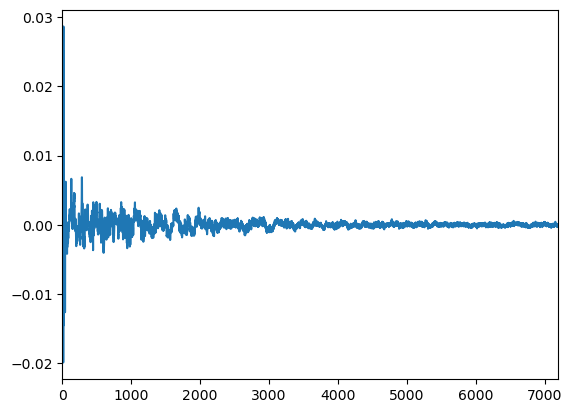

In [13]:
plt.plot(test_rir)
plt.xlim(0, len(test_rir))

In [14]:
sr = 24000
Audio(data=test_rir, rate=sr)